# NetworkX Tutorial 2

In this tutorial we aim to introduce NetworkX basic functionality. "NetworkX is a Python toolbox for the creation, manipulation and study of the structure, dynamics and functions of complex networks." [1]

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Bipartite Graphs
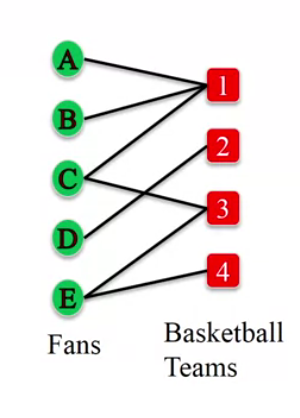

In [2]:
# There is no separate class for bipartite graphs in networkx.
from networkx.algorithms import bipartite

In [4]:
B = nx.Graph()

In [5]:
B.add_nodes_from(['A','B','C','D','E'], bipartite=0)

In [6]:
B.add_nodes_from([1,2,3,4], bipartite=1)

In [7]:
B.add_edges_from([('A',1),('B',1),('C',1),('C',3),('D',2),('E',3),('E',4)])

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


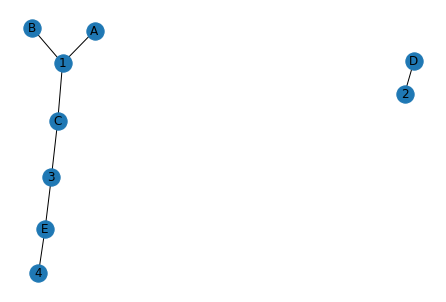

In [8]:
nx.draw(B, with_labels=True) 
plt.show()

#### What kind of questions can we ask about a bipartite graph?

In [9]:
# Is bipartite
bipartite.is_bipartite(B)

True

In [10]:
B.add_edge('A','B')

In [11]:
bipartite.is_bipartite(B)

False

In [12]:
B.remove_edge('A','B')

In [13]:
bipartite.is_bipartite(B)

True

In [14]:
# Is a certain set of node is a bipartition of a certain graph
X=set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X)

True

## Erdos Renyi Random Graph

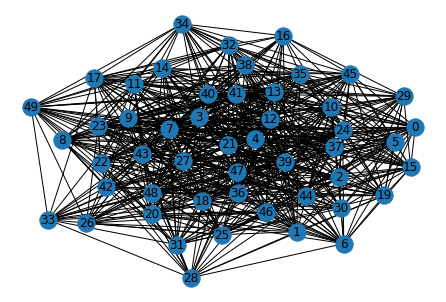

In [15]:
G = nx.erdos_renyi_graph(50,0.5) 
nx.draw(G, with_labels=True) 
plt.show()

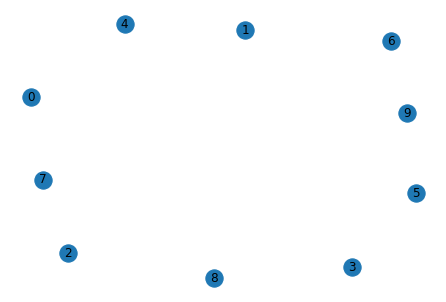

In [16]:
I= nx.erdos_renyi_graph(10,0)
nx.draw(I, with_labels=True) 
plt.show()

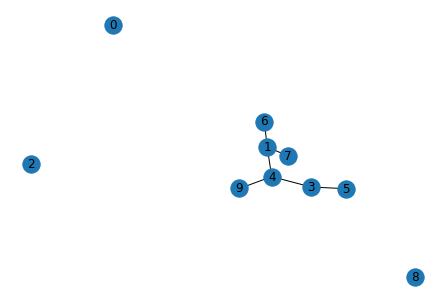

In [17]:
K=nx.erdos_renyi_graph(10,0.25) 
nx.draw(K, with_labels=True) 
plt.show() 

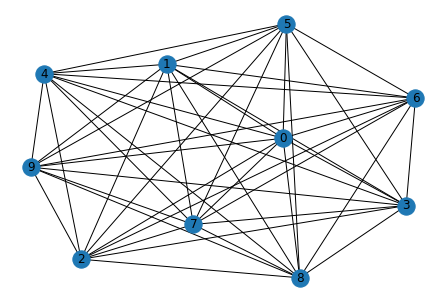

In [19]:
H= nx.erdos_renyi_graph(10,1) 
nx.draw(H, with_labels=True) 
plt.show()

## Clustering Coefficient 
**Triadic closure**: It is the tendency of the nodes (people) who share common connections in a social network to get connected. <br>
**Local Clustering Coefficient**: Fraction of pair of Node’s friend that are friends with each other. <br>

Local clustering coefficient = # of the node friends who are friends / # of pairs of the node's friends <br>
Let's see an example.

<img src="cc1.png" alt="Drawing" style="width: 800px;"/>

<img src="cc2.png" alt="Drawing" style="width: 300px;"/>

In [ ]:
g=nx.Graph()
g.add_nodes_from(['A','B','C','D','E','F','G','H','I','J','K'])

In [ ]:
g.add_edges_from([('A','B'),
                  ('A','C'),
                  ('A','K'),
                  ('B','C'),
                  ('B','K'),
                  ('C','E'),
                  ('C','F'),
                  ('E','D'),
                  ('E','H'), 
                  ('F','G'), 
                  ('F','E'),
                  ('I','J')])

In [ ]:
nx.draw(g, with_labels=True) 
plt.show()

In [ ]:
# To compute the local clustering coefficient for a certain node
nx.clustering(g,'E')

In [ ]:
nx.clustering(g,'F')

**Global clustering coefficient**: the clustering coefficient for the whole graph. <br>
Two approaches for calculating the global clustering coefficient:
1. Average local clustering coefficient over all the nodes.
2. Percentage of open triads that are triangles. (Transitivity)

<img src="cc3.png" alt="Drawing" style="width: 800px;"/>

In [ ]:
# Method 1
nx.average_clustering(g)

In [ ]:
# Method 2
nx.transitivity(g)

## Centrality Measures
**Degree Centrality**: This is based on the assumption that important nodes have many connections. <br>
**Closeness Centrality**: This is based on the assumption that important nodes are close to other nodes. It is calculated as the sum of the path lengths from the given node to all other nodes. <br>
**Betweenness Centrality**: It assumes that important nodes connect other nodes. 

In [ ]:
# Let's go back to karate example
G = nx.karate_club_graph() 
plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G, with_labels = True, node_size=700, node_color='pink') 

In [ ]:
deg_centrality = nx.degree_centrality(G) 
# G is the Karate Club Graph 
print(deg_centrality) 

Note the highest degrees are node 0 and 33.

In [ ]:
close_centrality = nx.closeness_centrality(G) 
# G is the Karate Social Graph 
print(close_centrality) 

In [ ]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False) 
# G is the Karate Social Graph, parameters normalized 
# and endpoints ensure whether we normalize the value 
# and consider the endpoints respectively. 
print(bet_centrality) 

## Degree Distribution

In [ ]:
R = nx.erdos_renyi_graph(1000,0.5) 

In [ ]:
degrees = [R.degree(n) for n in R.nodes()]
plt.hist(degrees)
plt.show()